# Linear Regression(선형회귀모델)

## Linear Regression 모델
> **`Linear Regression`** 은 **예측**을 위한 **지도학습** 머신러닝 모델   
종속변수가 존재해야하며 종속변수의 데이터가 **연속형**일 경우 사용  
ex) 주가, 매출, 키, 몸무게, 대출금액 예측문제  
사용해야하는 설명변수의 갯수에 따라 설명변수 하나를 사용하는 **단순회귀모델**과 설명변수 여러개를 사용하는 **다중회귀모델**로 구분  
설명변수에 패널티를 추가한 **`Lasso`**, **`Ridge`** 모델까지 확장이 가능하다.  
>> `y = f(x)` 의 기본적인 머신러닝 함수에서  
`y` : 종속변수(예측하고자 하는 값, 타겟, 연속형 변수)  
`f( )` : Linear model, 예측문제를 풀어내는 함수 혹은 모델  
`x` : 설명변수(종속변수에 영향을 주는 데이터, feature, 연속형 혹은 이산형 변수) 로 설명이 가능하다.

## Regression(회귀) 이란?
일반적으로 선형회귀방정식이라 부름. 종속변수와 독립변수 사이의 관계를 분석할 경우 많이 사용합니다. +상관분석

> - 통계학 - 한 개의 독립변수와 종속변수 간 관계를 잘 설명하는 직선(회귀직선) 추정. 데이터 분할 X, 전체 데이터 넣고 변수별 영향력 파악  
> - 머신러닝 - 모델자체에는 크게 관심을 두지 않고 예측을 위해 사용. 데이터 분할 O, 모델 평가

## 단순선형회귀모델(Simple Linear Regression)
한 개의 독립 변수와 종속 변수 간 관계를 잘 설명하는 직선을 단순회귀모델이라고 한다.  

단순회귀모델의 구조는 아래와 같습니다.  

# $$ y_i = \beta_0 + \beta_1 x_i + \varepsilon_i  $$  
# $$ y_i = \hat{y}+ \varepsilon_i  $$  

> $\beta_0$ : 절편  
$\beta_1$ : 기울기  
$x_i$ : $i$ 번째 샘플의 독립변수 값  
$y_i$ : $i$ 번째 샘플의 종속변수 값  
$\hat{y}_i$ : $i$ 번째 샘플의 종속변수 예측 값 ($\hat{y}_i = \beta_0 + \beta_1 x_i$)  
$\varepsilon_i$ : $i$ 번째 샘플의 예측 오차 ($y_i - \hat{y}_i$)

In [1]:
# 필요 모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

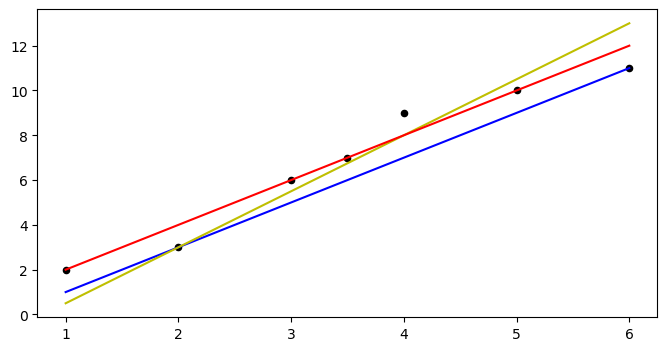

In [14]:
# 단순선형회귀모델의 여러가지 가정에 따른 모델링 시각화
plt.figure(figsize=(8, 4))
x = np.array([1, 2, 3, 3.5, 4, 5, 6])
y = np.array([2, 3, 6, 7, 9, 10, 11])
plt.scatter(x, y, s=20, c='black') # matplotlib 산점도 그래프

# plt.plot(x, 3 * x, 'r') # 선 그래프
# plt.plot(x, 3 * x - 3, 'g')
plt.plot(x, 2 * x - 1, 'b')
plt.plot(x, 2.5 * x - 2, 'y')
plt.plot(x, 2 * x , 'r')

위의 샘플예제에서 $f(x) = 2x$ 가 가장 데이터를 잘 설명하는 직선이 된다.  

### 모델 학습(traing, fitting)
회귀모델의 학습은 회귀모델에 포함된 계수인 $\beta_0$ 와 $\beta_1$을 추정한다.  
최소자승법(least square method): 회귀모델은 오차의 제곱합을 최소화하는 방향으로 계수를 추정.  

#### 비용 함수 (cost function)
$$ Cost = {1\over2n} \sum_i^n{(y_i - \hat y_i)^2}$$
분모의 2는 미분할 때 편의성을 위해 추가함

In [15]:
# 가정에 따른 함수 h 정의
def h1(x):
    return 2 * x

def h2(x):
    return 2 * x + 1

def h3(x):
    return 2 * x - 1

def h4(x):
    return 3 * x - 3

def h5(x):
    return 3 * x - 4

In [22]:
# 비용함수 j
def j(x, y, h):
    return sum( (y - h(x)) ** 2 ) / (2 * len(x))

In [23]:
# 비용함수 결과출력
print(j(x, y, h1))
print(j(x, y, h2))
print(j(x, y, h3))
print(j(x, y, h4))
print(j(x, y, h5))

0.21428571428571427
0.8571428571428571
0.5714285714285714
1.7321428571428572
1.5892857142857142


단순선형회귀모델의 비용함수는 각 가정에 대한 비용함수의 결과의 집합이고 이를 2차원 평면상에 그려보면 2차 함수임을 확인 가능합니다.  
<img src="https://drive.google.com/uc?id=1SN5yLjAp3gGUkGQ4G_lwve6OEaBslrss">

#### 비용함수의 최소화, 경사하강법 (gradient decent)
위에서 정의 된 비용함수 $ Cost = {1\over2n} \sum_i^n{(y_i - \hat y_i)^2}$ 의 최소값을 찾기 위해서는 미분이 필요하다. (미분값이 0이 되는 지점)

<img src="https://drive.google.com/uc?id=1vpAbQJAhkYKUG6sNmb3CgvtBdY4vyten">
비용함수의 미분값에 따라 추정하고자 하는 파라메터(X)를 미분값과 반대방향으로 움직이면서 비용함수의 최소값에 다다르게 함.    

(변수가 2개일 때의 비용 함수)
<img src="https://drive.google.com/uc?id=1ImhFj4qtiYazwUb7YLjAqo38g2HHjyLO">

#### 비용함수의 최소화, 정규방정식
비용함수의 미분을 통한 정규방정식을 행렬연산을 통하여 구할 수도 있습니다. 참고자료 확인
<img src="https://drive.google.com/uc?id=1srzfiaG35Io9Yvv2rqcNHiAWxqCYGRx7">
<img src="https://drive.google.com/uc?id=1Lm92qmnxcgoUc3r324COsYFdbTHNGwd4">

## 선형회귀모델의 평가
선형회귀모델의 평가는 모델의 해석력(설명력, r2 score), 그리고 모델의 예측력(오차)을 위한 평가방법으로 나눌 수 있습니다.  

> **RMSE** : 평균제곱오차의 제곱근   
예측모델에서 가장 많이 쓰이는 지표, 예측이 대략 평균적으로 RMSE만큼 오차가 난다고 해석합니다.  
비용함수에 루트값. 언제나 MAE보다 값이 큼. 오차를 제곱하기 때문에 부호 영향성도 제거함  
  
$$\sqrt{{1\over n}\sum_i^n{(y_i - \hat y_i)^2}}$$

> **MAE** : 평균절대 오차  
예측모델에서 종종 쓰이는 지표, 실제 예측값에 절대값을 씌워 예측결과 오차를 그대로 해석.(평균)  
  
$${1\over n}\sum_i^n{\left\vert(y_i - \hat y_i)\right\vert}$$

> **R2 score** : 결정계수 혹은 설명계수. 독립변수가 얼마나 종속변수를 잘 설명할 수 있는지 나타냄.  
0과 1사이 범위에 있으며, 1에 가까울 수록 모델이 종속변수를 잘 설명한다고 해석한다.  
일반적으로는 R2 score가 0.6 이상이여야 사용가능한 모델이라고 해석한다.

<img src="https://drive.google.com/uc?id=1Ly4JaSDoulmSAiS_RG1EdX8nmFI26Wyy">

$$SST = SSR + SSE$$  
$$R^2 = 1 - {SSE \over SST} = {SSR \over SST} = {선형모형 오차 \over 전체 오차}$$  

SST : 전체 오차(= yi - y)  
r2 score : 전체 오차 중에서 선형 모델로 설명 가능한 오차의 변동분. 모델의 해석력(설명력)

## 다중선형회귀모델 (Multiple Linear Regression)
독립 변수가 둘 이상인 가장 일반적인 형태의 선형회귀모델
  
다중선형회귀모델의 구조는 아래와 같습니다.  

# $$ y_i = \beta_0 + \beta_1 x_{i,1} + \beta_2 x_{i,2} + \cdots + \beta_p x_{i,p} + \varepsilon_i  $$  

> $\beta_0$ : 절편  
$\beta_p$ : $p$번째 독립변수의 계수  
$x_{i,p}$ : $i$ 번째 샘플의 $p$번째 독립변수 값  
$y_i$ : $i$ 번째 샘플의 종속변수 값  
$\hat{y}_i$ : $i$ 번째 샘플의 종속변수 예측 값 ($\hat{y}_i = \beta_0 + \beta_1 x_{i,1} + \beta_2 x_{i,2} + \cdots + \beta_p x_{i,p}$)  
$\varepsilon_i$ : $i$ 번째 샘플의 예측 오차 ($y_i - \hat{y}_i$)

행렬과 벡터를 이용한 표현으로 아래와 같이 표현이 가능합니다.

# $$ y = X\beta + \varepsilon $$

# $ y = \begin{pmatrix} y_1 \\ y_2 \\ \vdots  \\ y_n\end{pmatrix}$ $ X = \begin{pmatrix} 1 & x_{1,1} & \dots & x_{1,p} \\ 1 & x_{2,1} & \dots & x_{2,p} \\ \vdots & \vdots & \ddots & \vdots \\ 1 & x_{n,1} & \dots & x_{n,p}\end{pmatrix} $ $ \beta = \begin{pmatrix} \beta_0 \\ \beta_1 \\ \vdots  \\ \beta_p\end{pmatrix}$ $ \varepsilon = \begin{pmatrix} \varepsilon_0 \\ \varepsilon_1 \\ \vdots  \\ \varepsilon_n\end{pmatrix}$

### 모델학습 및 비용함수
기본선형회귀모델과 마찬가지로 최소자승법을 사용합니다.

#### 비용함수
$$\varepsilon = y - \hat{y}$$  
$$\hat{y} = X\beta$$  
$$J = \varepsilon^T\varepsilon = (y - \hat{y})^T(y - \hat{y})$$  
$$ =(y^T - \beta^TX^T)(y - X\beta) $$  
$$ =y^Ty - y^TX\beta - \beta^TX^Ty - \beta^TX^TX\beta$$

$$ {\partial J \over \partial \beta} = 0 \Rightarrow   \beta = (X^TX)^{-1}X^Ty$$
(행렬-벡터 미분 생략)

### 다중 선형 회귀 모델 실습

In [24]:
# boston 데이터 확인
df = pd.read_csv('./data/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
# 타겟데이터 분할
y = df['y']
X = df.drop('y', axis=1)

In [52]:
# 훈련셋과 테스트셋 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [53]:
# 모델 정의
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [54]:
# 모델 학습
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
# 모델 예측
lr_pred = lr.predict(X_test)

In [56]:
# 모델 평가지표 출력
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
lr_r2_score = r2_score(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_rmse2 = mean_squared_error(y_test, lr_pred, squared=False)  # root 안씌우고 파라미터로 가능
lr_mae = mean_absolute_error(y_test, lr_pred)
print(f'R2 score : {lr_r2_score}')
print(f'RMSE : {lr_rmse}')
print(f'RMSE : {lr_rmse2}')
print(f'MAE : {lr_mae}')

R2 score : 0.6844267283527129
RMSE : 4.700924890603763
RMSE : 4.700924890603763
MAE : 3.060939595437043


In [41]:
# 평가지표 해석
'''
R2 score : 모델에 사용한 설명변수들이 y의 변동분을 약 68% 설명 가능하다. (수치적으로는 사용 가능한 모델)
RMSE : 모델 예측값이 평균적으로 4.7만 달러 오차를 보임
MAE : 모델 예측값이 평균적으로 3.1만 달러 오차를 보임
'''

'\nR2 score : 모델에 사용한 설명변수들이 y의 변동분을 약 68% 설명 가능하다. (수치적으로는 사용 가능한 모델)\nRMSE : 모델 예측값이 평균적으로 4.7만 달러 오차를 보임\nMAE : 모델 예측값이 평균적으로 3.1만 달러 오차를 보임\n'

In [42]:
# 모델 계수 확인 (모델. +tab키 누르면 사용 가능한 것들이 보임)
lr.coef_, lr.intercept_

(array([-1.28322638e-01,  2.95517751e-02,  4.88590934e-02,  2.77350326e+00,
        -1.62388292e+01,  4.36875476e+00, -9.24808158e-03, -1.40086668e+00,
         2.57761243e-01, -9.95694820e-03, -9.23122944e-01,  1.31854199e-02,
        -5.17639519e-01]),
 29.83642016383913)

In [51]:
# 값 대입해서 y pred값 구해보기
lr.intercept_ + X_test.iloc[0].values @ lr.coef_    # @ : 벡터의 내적

28.83885358645366

In [50]:
lr.predict(X_test.iloc[0].values.reshape(1,-1))

C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28.83885359])

## 정규화 모델
> 일반적으로 샘플 수가 변수 갯수보다 적거나 크게 많지 않다면 회귀모델은 **과적합(overfitting)** 되는 경향이 있습니다.  
샘플이 많을수록 과적합 확률이 줄어든다.   
회귀모델은 종속변수와 큰 관계가 없는 변수를 없애 주지 못함(수작업 필요).   
이를 해결하기 위하여 설명 변수가 너무 많으면 정규화(규제)를 통해 이를 해결합니다.  
최소자승법은 $\beta_i = 0$을 만들어주지 못함.  

### 과적합(overfitting)  
> 학습 데이터로 학습한 모델의 테스트 데이터 예측 성능이 떨어지는 경우 (머신러닝에서 빈번하게 발생)  
모델이 일반화를 잘 못 시키는 상태. 실제 데이터 예측을 잘 못한다고 해석이 가능합니다.

<img src="https://drive.google.com/uc?id=1szCkyN_9u5Dkn-b5Q5YbitKbOtzqkkrB">

In [57]:
'''
통계분석에서는 다중공선성이 있는 변수를 제거하며 과적합 해결
머신러닝에서는 변수가 너무 많아서 일일히 확인할 수 없음.. L1/L2 패널티를 주는 모델로 과적합 해결
'''

'\n통계분석에서는 다중공선성이 있는 변수를 제거하며 과적합 해결\n머신러닝에서는 변수가 너무 많아서 일일히 확인할 수 없음.. L1/L2 패널티를 주는 모델로 과적합 해결\n'

### Lasso 모델
기존 회귀모델의 비용함수에 설명변수의 베타 절대값의 합 $\lambda\sum_{j=1}^p\left\vert\beta_j\right\vert$를 패널티 식으로 추가. (마름모꼴 → 회귀계수를 0으로)
$$J = \sum_{i=1}^n{(y_i - \hat y_i)^2} + \lambda\sum_{j=1}^p\left\vert\beta_j\right\vert$$  

> $n$ : 샘플갯수  
> $p$ : 설명변수갯수  

모델이 최적화 과정을 거치면서 비용함수의 최소값이 패널티 영역(회색)과 "가장 먼저" 만나는 지점에서 정규화 모델의 최적이 이루어집니다.  
회귀모델의 오차와 베타 절대값합에 해당하는 값을 동시에 최소화 시키는 방법으로 학습을 진행합니다.  
불필요하게 설명변수의 갯수가 많을 경우 **회귀계수의 크기($\beta$값)를 0으로 만들면서** 최적을 찾아갑니다. (가중치인 $\lambda$ 값 변경하며)  
많은 변수에 큰 패널티를 주며 독립변수의 갯수가 ridge 모델보다 상대적으로 많은 경우 Lasso 모델을 사용합니다.
<img src="https://drive.google.com/uc?id=1dfgw998nZMEx2IYMBrF8h9Oov1I0KKpv">

### Ridge 모델
기존 회귀모델의 비용함수에 설명변수의 베타의 제곱 합을 패널티로 $\lambda\sum_{j=1}^p\beta_j^2$를 패널티 식으로 추가. (원형 → 회귀계수를 감소)
$$ J = \sum_{i=1}^n{(y_i - \hat y_i)^2} + \lambda\sum_{j=1}^p\beta_j^2$$  

> $n$ : 샘플갯수  
> $p$ : 설명변수갯수  

회귀모델의 오차와 베타 제곱합에 해당하는 값을 동시에 최소화 시키면서 학습을 진행합니다.  
불필요하게 과대계상 된 변수의 **회귀계수의 크기를 감소**시키는 방법으로 학습을 진행합니다.    
많은 변수에 패널티를 주며 독립변수의 갯수가 Lasso 모델보다 상대적으로 작은 경우 Ridge 모델을 사용합니다. (일반적임)
<img src="https://drive.google.com/uc?id=1Auobpo3aWiHGLqmyqjksxOD69XRDRdFy">

### 정규화 모델 실습

In [58]:
# 모델 import
from sklearn.linear_model import Ridge, Lasso

#### Ridge model

In [60]:
# 모델 정의
# 규제화모델의 경우 파라메터로 규제화강도에 해당하는 alpha 값(=lamda값)을 같이 전달함. 
rg = Ridge(alpha = 1)  # 1이 default

In [62]:
# 모델 학습
rg.fit(X_train, y_train)

Ridge(alpha=1)

In [63]:
# 모델 예측
rg_pred = rg.predict(X_test)

In [66]:
# 모델 평가
rg_r2_score = r2_score(y_test, rg_pred)
rg_rmse = mean_squared_error(y_test, rg_pred, squared=False)
rg_mae = mean_absolute_error(y_test, rg_pred)

In [70]:
print(f'rg R2 score : {rg_r2_score}')
print(f'rg RMSE : {rg_rmse}')
print(f'rg MAE : {rg_mae}')

rg R2 score : 0.6789748327846079
rg RMSE : 4.741357980709099
rg MAE : 3.0503751260061787


### <모델별 평가지표 비교>

lr R2 score : 0.6844267283527129  
lr RMSE : 4.700924890603763  
lr MAE : 3.060939595437043  
    
* lr보다 rg에서 설명력이 더 떨어짐. 설명변수가 많은게 아니다! 오히려 부족하다!    
* 설명변수 개수를 늘리거나 샘플 수를 늘릴 필요가 있다. (모델별로 비교하며 어떻게 보완해야할 지 생각할 수 있음)
* 설명변수 개수를 늘리기 위해 다항회귀 적용

In [68]:
# 모델 계수 확인
rg.coef_, rg.intercept_

(array([-0.12383039,  0.03139178,  0.01767668,  2.54277179, -8.77249222,
         4.37980204, -0.01537349, -1.29086084,  0.24406848, -0.01082435,
        -0.83346553,  0.01348642, -0.53435396]),
 24.878370472969383)

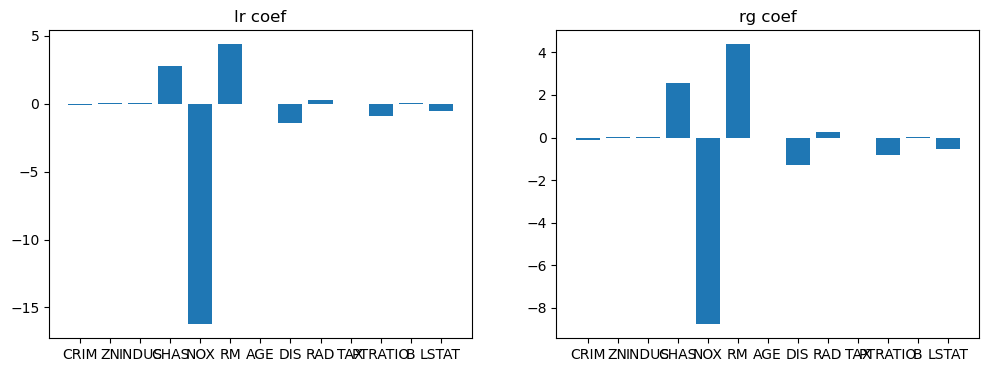

In [77]:
# 기존모델에서의 회귀계수 와 ridge모델 계수 플로팅(시각화)
lr.coef_, rg.coef_

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.bar(X_train.columns, lr.coef_)
plt.title("lr coef")

plt.subplot(1,2,2)
plt.bar(X_train.columns, rg.coef_)
plt.title("rg coef")

plt.show()

#### Lasso model

In [79]:
# 모델 정의
from sklearn.linear_model import Lasso
ls = Lasso(alpha = 0.5)

In [80]:
# 모델 학습
ls.fit(X_train, y_train)

Lasso(alpha=0.5)

In [81]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [83]:
# 모델 예측
ls_pred = ls.predict(X_test)

In [84]:
# 모델 평가
ls_r2_score = r2_score(y_test, ls_pred)
ls_rmse = mean_squared_error(y_test, ls_pred, squared=False)
ls_mae = mean_absolute_error(y_test, ls_pred)

In [85]:
print(f'ls R2 score : {ls_r2_score}')
print(f'ls RMSE : {ls_rmse}')
print(f'ls MAE : {ls_mae}')

ls R2 score : 0.6682669635258389
ls RMSE : 4.819783916323324
ls MAE : 3.1906876787587217


In [86]:
# 모델 계수 확인 => 성능이 좋으면 계수 확인할 필요 X
ls.coef_, ls.intercept_

(array([-1.04436885e-01,  3.10591957e-02, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00,  3.01536493e+00, -5.09718774e-04, -8.62756664e-01,
         2.28002780e-01, -1.20214454e-02, -7.31718940e-01,  1.31381070e-02,
        -6.63404109e-01]),
 26.814373868940528)

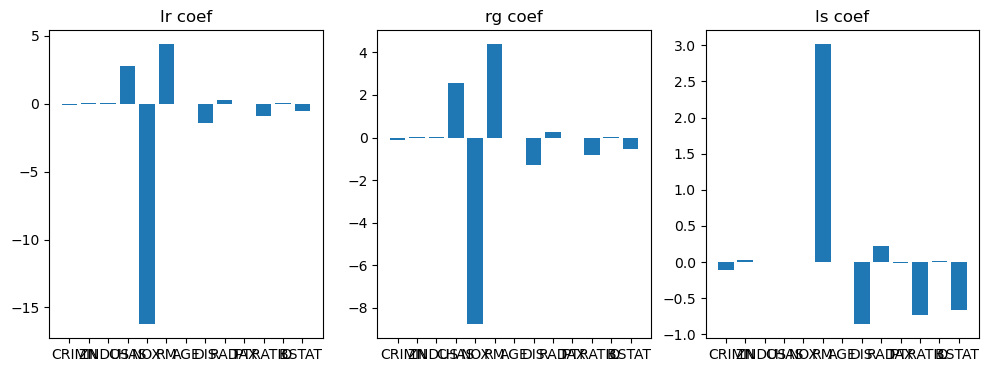

In [88]:
# 계수 플로팅
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.bar(X_train.columns, lr.coef_)
plt.title("lr coef")

plt.subplot(1,3,2)
plt.bar(X_train.columns, rg.coef_)
plt.title("rg coef")

plt.subplot(1,3,3)
plt.bar(X_train.columns, ls.coef_)
plt.title("ls coef")

plt.show()

## 다항회귀
> 선형회귀의 경우 설명변수와 종속변수의 관계를 선형관계로 해석하지만 현실 문제는 선형으로 해결이 불가능한 경우가 많습니다.  
선형모델의 구조적 한계를 보완하고자 **변수 간 영향력에 해당하는 새로운 변수를 생성**하여 방정식을 비선형으로 만들고 선형모델을 적용시킬 수 있습니다.  
2차원 예시 $x_1, x_2, x_3$를 $x_1^2, x_2^2, x_3^2, x_1x_2, x_1x_3, x_2x_3$으로 변환하여 변수를 확장. (모든 변수의 combination 조합)  
> → 기본적인 통계 가정(변수간 독립성)도 깨고 진행,, 머신러닝은 예측력이 중요하기 때문에 통계 가정 무시함,,  
> → y값에 영향을 주는 설명변수, 베타분석을 위해서는 사용이 어려우나 예측결과값이 가장 중요한 문제에서는 사용이 좋은 편

보통 2차원 또는 3차원까지 적용하며, 변수가 많아지므로 (Ridge,) Lasso 모델을 적용한다.

### 다항회귀 실습

In [90]:
# 필요모델 import
from sklearn.preprocessing import PolynomialFeatures

In [93]:
# 다항변수 제작함수 인스턴스화
poly = PolynomialFeatures(degree=2, include_bias=False)
'''
파라메터
degree=2 : 차수 설정
include_bias=False : 상수항 제거(필수). b0는 곱의 조합에서 제외함
'''

'\n파라메터\ndegree=2 : 차수 설정\ninclude_bias=False : 상수항 제거(필수). b0는 곱의 조합에서 제외함\n'

In [96]:
# 변수 변환
# X_train에 해당하는 변수를 학습과 동시에 변환 적용
poly_X_train = poly.fit_transform(X_train)

In [98]:
# shape 확인
poly_X_train.shape, X_train.shape

((379, 104), (379, 13))

In [99]:
# 변환식 반환
poly.get_feature_names_out()

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'CRIM^2', 'CRIM ZN', 'CRIM INDUS',
       'CRIM CHAS', 'CRIM NOX', 'CRIM RM', 'CRIM AGE', 'CRIM DIS',
       'CRIM RAD', 'CRIM TAX', 'CRIM PTRATIO', 'CRIM B', 'CRIM LSTAT',
       'ZN^2', 'ZN INDUS', 'ZN CHAS', 'ZN NOX', 'ZN RM', 'ZN AGE',
       'ZN DIS', 'ZN RAD', 'ZN TAX', 'ZN PTRATIO', 'ZN B', 'ZN LSTAT',
       'INDUS^2', 'INDUS CHAS', 'INDUS NOX', 'INDUS RM', 'INDUS AGE',
       'INDUS DIS', 'INDUS RAD', 'INDUS TAX', 'INDUS PTRATIO', 'INDUS B',
       'INDUS LSTAT', 'CHAS^2', 'CHAS NOX', 'CHAS RM', 'CHAS AGE',
       'CHAS DIS', 'CHAS RAD', 'CHAS TAX', 'CHAS PTRATIO', 'CHAS B',
       'CHAS LSTAT', 'NOX^2', 'NOX RM', 'NOX AGE', 'NOX DIS', 'NOX RAD',
       'NOX TAX', 'NOX PTRATIO', 'NOX B', 'NOX LSTAT', 'RM^2', 'RM AGE',
       'RM DIS', 'RM RAD', 'RM TAX', 'RM PTRATIO', 'RM B', 'RM LSTAT',
       'AGE^2', 'AGE DIS', 'AGE RAD', 'AGE TAX', 'AGE PTRATIO', 'AGE B',
       '

In [103]:
pd.options.display.max_columns = 150

In [105]:
# 데이터프레임으로 제작 후 데이터 확인
pd.DataFrame(poly_X_train, columns=poly.get_feature_names_out()).head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIM^2,CRIM ZN,CRIM INDUS,CRIM CHAS,CRIM NOX,CRIM RM,CRIM AGE,CRIM DIS,CRIM RAD,CRIM TAX,CRIM PTRATIO,CRIM B,CRIM LSTAT,ZN^2,ZN INDUS,ZN CHAS,ZN NOX,ZN RM,ZN AGE,ZN DIS,ZN RAD,ZN TAX,ZN PTRATIO,ZN B,ZN LSTAT,INDUS^2,INDUS CHAS,INDUS NOX,INDUS RM,INDUS AGE,INDUS DIS,INDUS RAD,INDUS TAX,INDUS PTRATIO,INDUS B,INDUS LSTAT,CHAS^2,CHAS NOX,CHAS RM,CHAS AGE,CHAS DIS,CHAS RAD,CHAS TAX,CHAS PTRATIO,CHAS B,CHAS LSTAT,NOX^2,NOX RM,NOX AGE,NOX DIS,NOX RAD,NOX TAX,NOX PTRATIO,NOX B,NOX LSTAT,RM^2,RM AGE,RM DIS,RM RAD,RM TAX,RM PTRATIO,RM B,RM LSTAT,AGE^2,AGE DIS,AGE RAD,AGE TAX,AGE PTRATIO,AGE B,AGE LSTAT,DIS^2,DIS RAD,DIS TAX,DIS PTRATIO,DIS B,DIS LSTAT,RAD^2,RAD TAX,RAD PTRATIO,RAD B,RAD LSTAT,TAX^2,TAX PTRATIO,TAX B,TAX LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2
0,0.09103,0.0,2.46,0.0,0.4880,7.155,92.2,2.7006,3.0,193.0,17.8,394.12,4.82,0.008286,0.0000,0.223934,0.00000,0.044423,0.651320,8.392966,0.245836,0.27309,17.56879,1.620334,35.876744,0.438765,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,6.0516,0.00,1.200480,17.60130,226.812,6.643476,7.38,474.78,43.788,969.5352,11.8572,0.0,0.000,0.000,0.0,0.0000,0.0,0.0,0.0,0.00,0.00,0.238144,3.491640,44.99360,1.317893,1.4640,94.1840,8.68640,192.330560,2.352160,51.194025,659.6910,19.322793,21.465,1380.915,127.3590,2819.92860,34.48710,8500.84,248.99532,276.6,17794.6,1641.16,36337.864,444.404,7.293240,8.1018,521.2158,48.07068,1064.360472,13.016892,9.0,579.0,53.4,1182.36,14.46,37249.0,3435.4,76065.16,930.26,316.84,7015.336,85.796,155330.5744,1899.6584,23.2324
1,3.53501,0.0,19.58,1.0,0.8710,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02,12.496296,0.0000,69.215496,3.53501,3.078994,21.747382,291.991826,6.170360,17.67505,1424.60903,51.964647,311.116230,53.095850,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,383.3764,19.58,17.054180,120.45616,1617.308,34.176890,97.90,7890.74,287.826,1723.2358,294.0916,1.0,0.871,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02,0.758641,5.358392,71.94460,1.520331,4.3550,351.0130,12.80370,76.656710,13.082420,37.847104,508.1552,10.738316,30.760,2479.256,90.4344,541.43752,92.40304,6822.76,144.17830,413.0,33287.8,1214.22,7269.626,1240.652,3.046770,8.7275,703.4365,25.65885,153.621455,26.217410,25.0,2015.0,73.5,440.05,75.10,162409.0,5924.1,35468.03,6053.06,216.09,1293.747,220.794,7745.7601,1321.9102,225.6004
2,0.03578,20.0,3.33,0.0,0.4429,7.820,64.5,4.6947,5.0,216.0,14.9,387.31,3.76,0.001280,0.7156,0.119147,0.00000,0.015847,0.279800,2.307810,0.167976,0.17890,7.72848,0.533122,13.857952,0.134533,400.0,66.6,0.0,8.858,156.4,1290.0,93.894,100.0,4320.0,298.0,7746.2,75.2,11.0889,0.00,1.474857,26.04060,214.785,15.633351,16.65,719.28,49.617,1289.7423,12.5208,0.0,0.000,0.000,0.0,0.0000,0.0,0.0,0.0,0.00,0.00,0.196160,3.463478,28.56705,2.079283,2.2145,95.6664,6.59921,171.539599,1.665304,61.152400,504.3900,36.712554,39.100,1689.120,116.5180,3028.76420,29.40320,4160.25,302.80815,322.5,13932.0,961.05,24981.495,242.520,22.040208,23.4735,1014.0552,69.95103,1818.304257,17.652072,25.0,1080.0,74.5,1936.55,18.80,46656.0,3218.4,83658.96,812.16,222.01,5770.919,56.024,150009.0361,1456.2856,14.1376
3,0.38735,0.0,25.65,0.0,0.5810,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26,0.150040,0.0000,9.935528,0.00000,0.225050,2.174196,37.030660,0.680651,0.77470,72.82180,7.398385,139.170982,10.559161,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,657.9225,0.00,14.902650,143.97345,2452.140,45.072180,51.30,4822.20,489.915,9215.7885,699.2190,0.0,0.000,0.000,0.0,0.0000,0.0,0.0,0.0,0.00,0.00,0.337561,3.261153,55.54360,1.020933,1.1620,109.2280,11.09710,208.747490,15.838060,31.505769,536.6028,9.863164,11.226,1055.244,107.2083,2016.69477,153.01038,9139.36,167.98832,191.2,17972.8,1825.96,34348.124,2606.056,3.087752,3.5144,330.3536,33.56252,631.344388,47.901272,4.0,376.0,38.2,718.58,54.52,35344.0,3590.8,67546.52,5124.88,364.81,6862.439,520.666,129089.3041,9794.2454,743.1076
4,0.06724,0.0,3.24,0.0,0.4600,6.333,17.2,5.2146,4.0,430.0,16.9,375.2

In [106]:
# test 데이터 동일한 모델로 적용
poly_X_test = poly.fit_transform(X_test)

In [109]:
# 모델 정의
poly_ls = Lasso(alpha = 1)

In [114]:
# 모델 학습
poly_ls.fit(poly_X_train, y_train)
# warning message -> Lasso의 꼭지점에서는 미분값이 나오지 않아서 나오는 자연스러운 메세지. 

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.113e+03, tolerance: 3.361e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1)

In [111]:
# 모델 예측
poly_pred = poly_ls.predict(poly_X_test)

In [112]:
# 모델 평가 => poly 변환 후 설명력이 높아졌다? 이건 비선형으로 풀었어야 했던 것
poly_r2_score = r2_score(y_test, poly_pred)
poly_rmse = mean_squared_error(y_test, poly_pred, squared=False)
poly_mae = mean_absolute_error(y_test, poly_pred)

In [113]:
print(f'poly R2 score : {poly_r2_score}')
print(f'poly RMSE : {poly_rmse}')
print(f'poly MAE : {poly_mae}')

poly R2 score : 0.7997588192632035
poly RMSE : 3.7446385578530488
poly MAE : 2.5169605856132122


In [121]:
for i in range(1,5):
    poly_ls = Lasso(alpha = i)
    poly_ls.fit(poly_X_train, y_train)
    poly_pred = poly_ls.predict(poly_X_test)
    
    poly_r2_score = r2_score(y_test, poly_pred)
    poly_rmse = mean_squared_error(y_test, poly_pred, squared=False)
    poly_mae = mean_absolute_error(y_test, poly_pred)
    
    print(f'alpha = {i}')
    print(f'poly R2 score : {poly_r2_score}')
    print(f'poly RMSE : {poly_rmse}')
    print(f'poly MAE : {poly_mae}\n')
    
    i+=1

alpha = 1
poly R2 score : 0.7997588192632035
poly RMSE : 3.7446385578530488
poly MAE : 2.5169605856132122

alpha = 2
poly R2 score : 0.7762174255554414
poly RMSE : 3.958643010926263
poly MAE : 2.6638921965020033

alpha = 3
poly R2 score : 0.7751402759860253
poly RMSE : 3.968158791629942
poly MAE : 2.622440898419534

alpha = 4
poly R2 score : 0.7726007422809659
poly RMSE : 3.990503788642369
poly MAE : 2.61377291553673



C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.113e+03, tolerance: 3.361e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.267e+03, tolerance: 3.361e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.345e+03, tolerance: 

In [123]:
# 모델 계수 확인
poly_ls.coef_, poly_ls.intercept_

(array([ 0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -2.80079564e-04,
        -0.00000000e+00, -0.00000000e+00, -3.94304860e-04,  0.00000000e+00,
         4.37757192e-04,  0.00000000e+00,  6.05747518e-04, -4.25594189e-04,
         0.00000000e+00,  0.00000000e+00,  8.60813355e-03,  5.42123901e-04,
         0.00000000e+00, -3.47788258e-03,  4.08689390e-04,  7.22286185e-03,
        -8.43491978e-04, -4.06503102e-03,  2.92368126e-05,  0.00000000e+00,
        -0.00000000e+00,  0.00000000e+00,  6.75500671e-03, -0.00000000e+00,
         0.00000000e+00, -1.46530644e-04, -1.01691311e-03, -6.67458127e-04,
        -1.83568777e-02, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.0

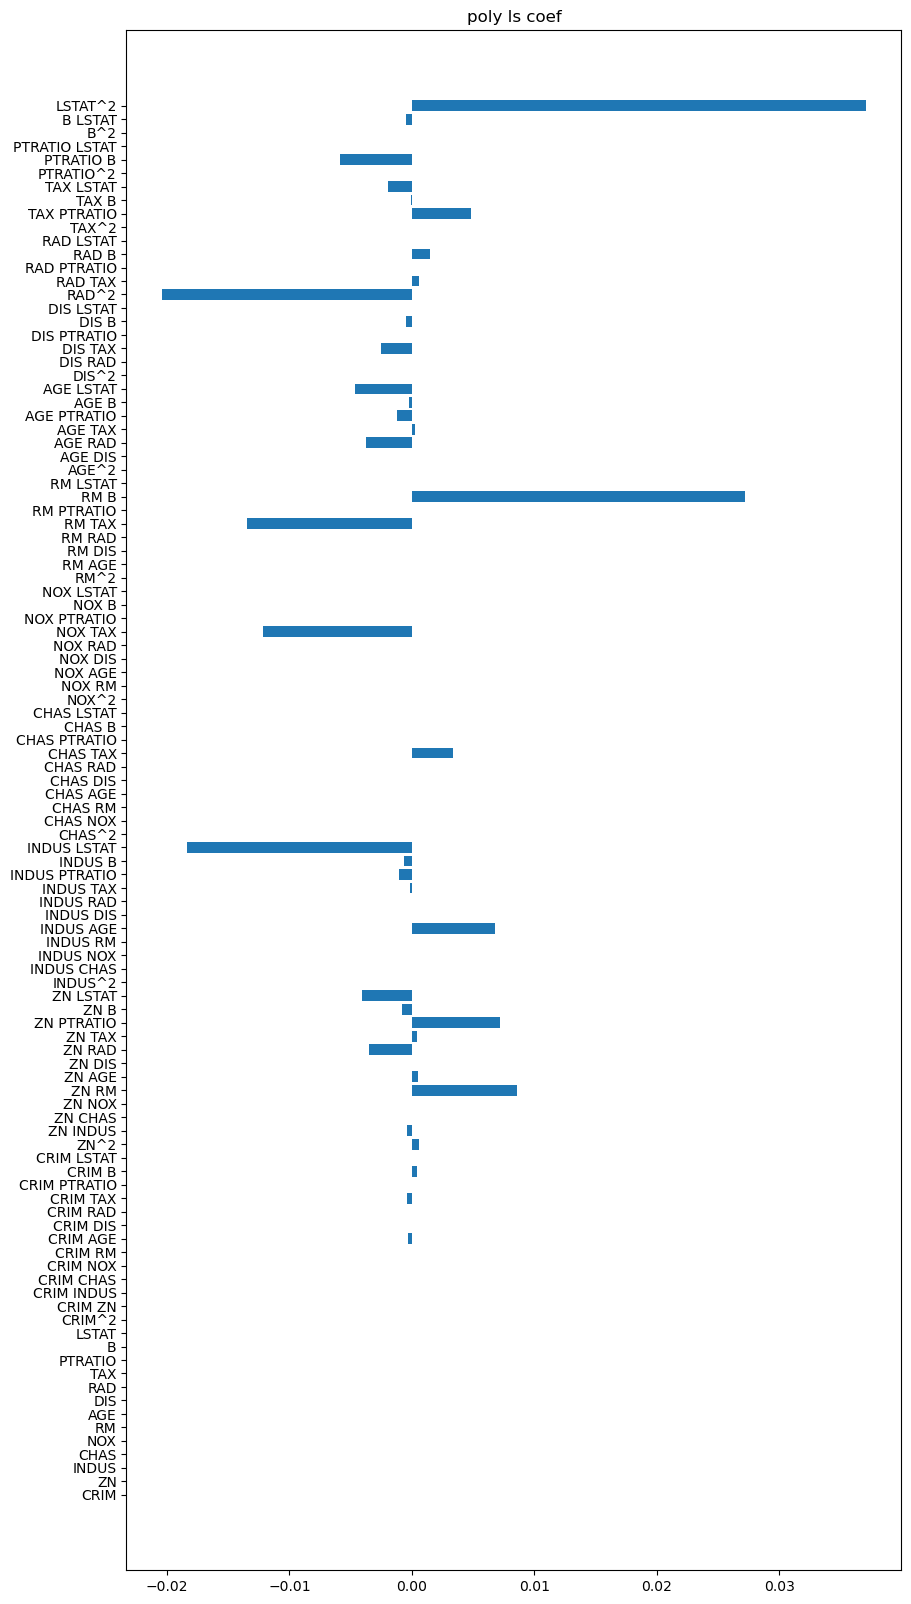

In [134]:
# 계수 플로팅
plt.figure(figsize=(10,20))
plt.barh(poly.get_feature_names_out(), poly_ls.coef_, )
plt.title("poly ls coef")

plt.show()